**Задание:**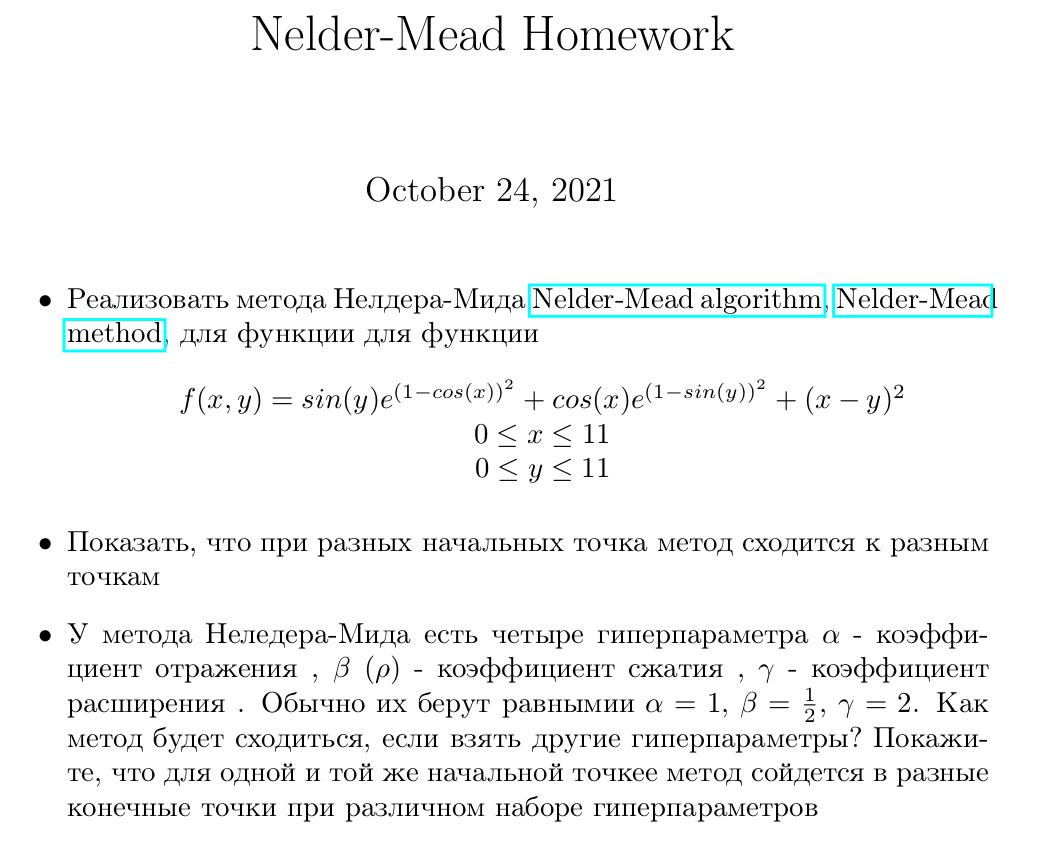

1. Начнем с реализации метода для функции $f(x, y) = sin(y)e^{(1-cos(x))^2} + cos(x)e^{(1-sin(y))^2} + (x-y)^2$, где $0 \leqslant x \leqslant 11$ и $0 \leqslant y \leqslant 11$.

In [10]:
import numpy as np

def NelderMead(f, simplex, alpha = 1, beta = 0.5, gamma = 2, sigma = 0.5, count = 20):
    prev_simplex = np.array(simplex)

    for i in range(count):
        simplex = sorted(prev_simplex, key = f)
        mid = (simplex[0] + simplex[-2]) / 2.0
        x_r = mid + alpha * (mid - simplex[-1])

        if f(simplex[0]) <= f(x_r) < f(simplex[-2]):
            simplex[-1] = x_r
            prev_simplex = simplex
            continue

        if f(x_r) < f(simplex[0]):
            x_e = mid + gamma * (x_r - mid)
            simplex[-1] = x_e if f(x_e) < f(x_r) else x_r
            prev_simplex = simplex
            continue

        x_c = mid + beta * (simplex[-1] - mid)
        
        if f(x_c) < f(simplex[-1]):
            simplex[-1] = x_c
            prev_simplex = simplex
            continue

        prev_simplex = [simplex[0]] + list(simplex[0] + sigma * np.subtract(simplex[0], simplex[1:]))

    return simplex[0]

def f(point):
    x, y = point
    return np.sin(y) * np.exp((1 - np.cos(x))**2) + np.cos(x) * np.exp((1 - np.sin(y))**2) + (x - y)**2

2. Теперь посмотрим на разные начальные точки и убедимся, что для них метод сходится к разным точкам.

In [11]:
point = NelderMead(f, [[0, 0], [0, 11], [11, 0]])
print("f({}) = {}".format(point, f(point)))

point = NelderMead(f, [[0, 0], [0, 5], [7, 0]])
print("f({}) = {}".format(point, f(point)))

f([3.13079027 4.69889255]) = -106.69657293372451
f([0.89447692 0.66913237]) = 1.4872463700183893


3. Теперь посмотрим, что будет если взять другие гиперпараметры, и убедимся, что для одной и той же точки при разных наборах гиперпараметров метод сойдется в разные конечные точки.

In [12]:
point = NelderMead(f, [[0, 0], [0, 11], [11, 0]])
print("f({}) = {}".format(point, f(point)))

point = NelderMead(f, [[0, 0], [0, 11], [11, 0]], 0.5, 0.8, 1.5, 1)
print("f({}) = {}".format(point, f(point)))

f([3.13079027 4.69889255]) = -106.69657293372451
f([-2.77683004  4.62264485]) = -37.41749794583485
